In [ ]:
!pip install -U kaleido

In [ ]:
!pip uninstall umap
!pip install umap-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import FastICA
from sklearn.manifold import Isomap
# import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score, f1_score, roc_auc_score

In [3]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = 'dataset1.csv', low_memory = False, skipinitialspace = True, float_precision = 'round_trip')
heart_faliure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [5]:
def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

# Univariate analysis of Categorical columns - Anaemia, High BP, Diabetes, Sex, Smoking

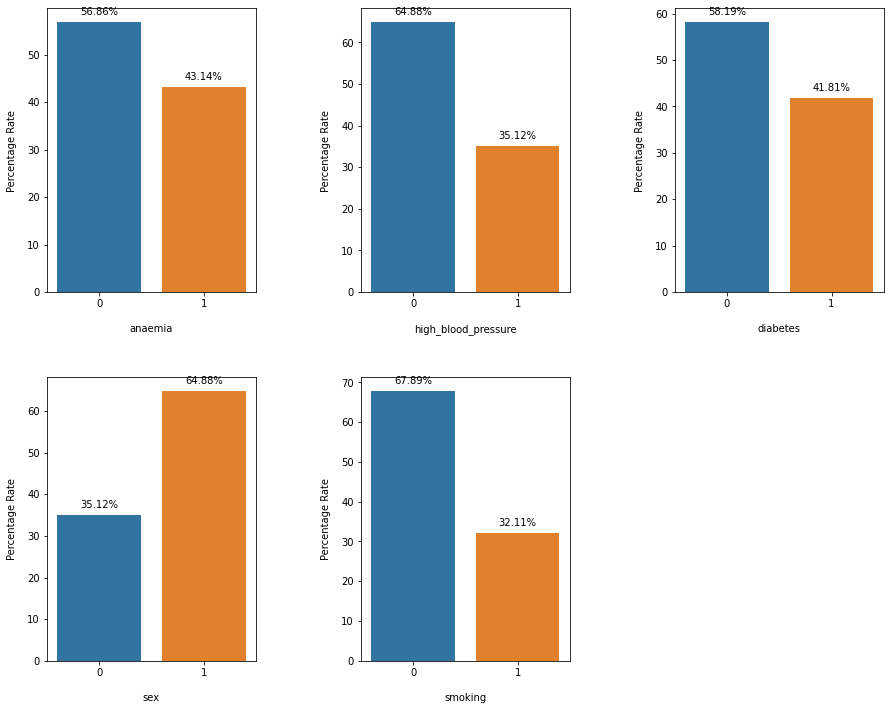

In [6]:
category_list = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((heart_faliure_data[col_list].value_counts(dropna = False))/
                    (len(heart_faliure_data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

# Age

In [7]:
colors = ['rgb(0, 0, 100)']
fig = ff.create_distplot(hist_data = [heart_faliure_data["age"].values], group_labels = ['age'],  colors = colors, bin_size=2)
fig.update_layout(title_text='Distribution of Age')
fig.show()

# Age on survival rate

In [ ]:
survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["age"]
not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["age"]
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']
hist_data = [survived, not_survived]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=[1, 1], colors = colors)
fig.update_layout(title_text = "Effect of Age on the Survival Rate")
fig.show()

# Gender on survival rate

In [ ]:
male = heart_faliure_data[heart_faliure_data["sex"] == 1]
female = heart_faliure_data[heart_faliure_data["sex"] == 0]
male_survived = male[heart_faliure_data["DEATH_EVENT"] == 0]
male_not_survived = male[heart_faliure_data["DEATH_EVENT"] == 1]
female_survived = female[heart_faliure_data["DEATH_EVENT"] == 0]
female_not_urvived = female[heart_faliure_data["DEATH_EVENT"] == 1]

labels = ['Male - Survived','Male - Not Survived', "Female - Survived", "Female - Not Survived"]
values = [len(male_survived),len(male_not_survived), len(female_survived),len(female_not_urvived)]
pie = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0, 0.1])])
pie.update_layout(title_text="Survival Rate w.r.t Gender")
pie.show()

# High BP on Survival rate

In [ ]:
hypertension_yes = heart_faliure_data[heart_faliure_data['high_blood_pressure']==1]
hypertension_no = heart_faliure_data[heart_faliure_data['high_blood_pressure']==0]
hypertension_yes_survived = hypertension_yes[heart_faliure_data["DEATH_EVENT"] == 0]
hypertension_yes_not_survived = hypertension_yes[heart_faliure_data["DEATH_EVENT"] == 1]
hypertension_no_survived = hypertension_no[heart_faliure_data["DEATH_EVENT"] == 0]
hypertension_no_not_survived = hypertension_no[heart_faliure_data["DEATH_EVENT"] == 1]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Hypertension Distribution', 'Hypertension & SR'])

labels1 = ["Hypertension YES","Hypertension NO"]
values1 = [len(hypertension_yes), len(hypertension_no)]

labels2 = ['Hypertension YES - Survived','Hypertension  YES - Not Survived', 'Hypertension NO - Survived',
           'Hypertension  NO - Not Survived']
values2 = [len(hypertension_yes_survived), len(hypertension_yes_not_survived),
          len(hypertension_no_survived), len(hypertension_no_not_survived)]
fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Hypertension"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Hypertension & Survival'), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Hypertension Distribution & Survival Rate (SR)")
fig.show()

# Diabetes on survival rate

In [ ]:
diabetes_yes = heart_faliure_data[heart_faliure_data['diabetes']==1]
diabetes_no = heart_faliure_data[heart_faliure_data['diabetes']==0]
diabetes_yes_survived = diabetes_yes[heart_faliure_data["DEATH_EVENT"] == 0]
diabetes_yes_not_survived = diabetes_yes[heart_faliure_data["DEATH_EVENT"] == 1]
diabetes_no_survived = diabetes_no[heart_faliure_data["DEATH_EVENT"] == 0]
diabetes_no_not_survived = diabetes_no[heart_faliure_data["DEATH_EVENT"] == 1]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Diabetes Distribution', 'Diabetes and Survival Rate'])

labels1 = ["Diabetes YES", "Diabetes NO"]
values1 = [len(diabetes_yes), len(diabetes_no)]

labels2 = ['Diabetes YES - Survived','Diabetes  YES - Not Survived', 'Diabetes NO - Survived',
           'Diabetes  NO - Not Survived']
values2 = [len(diabetes_yes_survived), len(diabetes_yes_not_survived),
          len(diabetes_no_survived), len(diabetes_no_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Diabetes"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Diabetes & Survival'), 1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Diabetes Distribution and Survival Rate...")
fig.show()

# Smoking on survival rate

In [ ]:
smoking_yes = heart_faliure_data[heart_faliure_data['smoking']==1]
smoking_no = heart_faliure_data[heart_faliure_data['smoking']==0]
smoking_yes_survived = smoking_yes[smoking_yes["DEATH_EVENT"] == 0]
smoking_yes_not_survived = smoking_yes[smoking_yes["DEATH_EVENT"] == 1]
smoking_no_survived = smoking_no[smoking_no["DEATH_EVENT"] == 0]
smoking_no_not_survived = smoking_no[smoking_no["DEATH_EVENT"] == 1]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Smoking Distribution', 'Smoking and Survival Rate'])

labels1 = ["Smoking YES", "Smoking NO"]
values1 = [len(smoking_yes), len(smoking_no)]

labels2 = ['Smoking YES - Survived','Smoking  YES - Not Survived', 'Smoking NO - Survived',
           'Smoking  NO - Not Survived']
values2 = [len(smoking_yes_survived), len(smoking_yes_not_survived), len(smoking_no_survived), len(smoking_no_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Smoking"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Smoking & Survival'), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Smoking Distribution and Survival Rate...")
fig.show()

# Anaemia on Survival Rate

In [ ]:
anaemia_yes = heart_faliure_data[heart_faliure_data['anaemia']==1]
anaemia_no = heart_faliure_data[heart_faliure_data['anaemia']==0]
anaemia_yes_survived = anaemia_yes[anaemia_yes["DEATH_EVENT"] == 0]
anaemia_yes_not_survived = anaemia_yes[anaemia_yes["DEATH_EVENT"] == 1]
anaemia_no_survived = anaemia_no[anaemia_no["DEATH_EVENT"] == 0]
anaemia_no_not_survived = anaemia_no[anaemia_no["DEATH_EVENT"] == 1]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],  subplot_titles=['Anaemia Distribution', 'Anaemia and Survival Rate'])

labels1 = ["Anaemia YES", "Anaemia NO"]
values1 = [len(anaemia_yes), len(anaemia_no)]

labels2 = ['Anaemia YES - Survived','Anaemia  YES - Not Survived', 'Anaemia NO - Survived',
           'Anaemia  NO - Not Survived']
values2 = [len(anaemia_yes_survived), len(anaemia_yes_not_survived),
          len(anaemia_no_survived), len(anaemia_no_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Anaemia"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Anaemia & Survival'), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Anaemia Distribution and Survival Rate...")
fig.show()

# Time on Survival Rate

In [ ]:
fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "time", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Follow up period")
fig.show()

# Creatinine Phosphokinase on Survival Rate

In [ ]:
fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "creatinine_phosphokinase", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Level of the CPK enzyme in the blood")
fig.show()

In [10]:
cpk_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["creatinine_phosphokinase"]
cpk_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["creatinine_phosphokinase"]

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [cpk_survived, cpk_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[50, 50], colors = colors)
fig.update_layout(title_text = "Effect of CPK levels on the Survival Rate")
fig.show()

# Ejection Fraction on Survival Rate

In [ ]:
fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "ejection_fraction", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Percentage of Blood leaving the left ventricle with each heartbeat...")
fig.show()

In [ ]:
ef_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["ejection_fraction"]
ef_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["ejection_fraction"]

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [ef_survived, ef_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[2, 2], colors = colors)
fig.update_layout(title_text = "Effect of Ejection Fraction on Survival Rate incase of Heart Failure")
fig.show()

# Platelets on Survival Rate

In [ ]:
fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "platelets", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Ptatelet Count Distribution and Survival Rate...")
fig.show()

In [ ]:
platelet_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["platelets"]
platelet_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["platelets"]

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [platelet_survived, platelet_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[50, 50], colors = colors)
fig.update_layout(title_text = "Platelet Count v/s. Survival Rate")
fig.show()

In [ ]:
fig = px.box(heart_faliure_data, x = 'DEATH_EVENT', y = 'platelets', points = "all", hover_name = 'DEATH_EVENT', color = 'DEATH_EVENT', notched=True)
fig.update_layout(title_text="Distribution of Platelets w.r.t Survival Rate")
fig.show()

# Serum Creatinine on Survival Rate

In [ ]:
print("Elevated Serum Levels and Death Cases")
print("-------------------------------------------------------------")

death_events = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]
print("Total number of death cases reported due to heart failure:", death_events.shape[0])

high_serum_level_deaths = death_events[death_events["serum_creatinine"] >= 1]
print("Total number of death cases with much higher serum levels:", high_serum_level_deaths.shape[0])

print("\nElevated Serum Levels and Survival Cases")
print("-------------------------------------------------------------")

survivals = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]
print("Total number of survivals after a heart failure condition:", survivals.shape[0])

high_serum_level_survivals = survivals[survivals["serum_creatinine"] >= 1]
print("Total number of survivals with higher serum levels:", high_serum_level_survivals.shape[0])

Elevated Serum Levels and Death Cases
-------------------------------------------------------------
Total number of death cases reported due to heart failure: 96
Total number of death cases with much higher serum levels: 87

Elevated Serum Levels and Survival Cases
-------------------------------------------------------------
Total number of survivals after a heart failure condition: 203
Total number of survivals with higher serum levels: 131


In [ ]:
temp = heart_faliure_data.copy()
temp['high_serum_level'] = [1 if x >= 1 else 0 for x in temp['serum_creatinine']] 
temp_high_serum = temp[temp["high_serum_level"] == 1]
temp_low_serum = temp[temp["high_serum_level"] == 0]

high_serum_survived = temp_high_serum[temp_high_serum["DEATH_EVENT"] == 0]
high_serum_not_survived = temp_high_serum[temp_high_serum["DEATH_EVENT"] == 1]
low_serum_survived = temp_low_serum[temp_low_serum["DEATH_EVENT"] == 0]
low_serum_not_survived = temp_low_serum[temp_low_serum["DEATH_EVENT"] == 1]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Serum Level Distribution', 'Serum and Survival Rate'])

labels1 = ["High Serum YES", "High Serum NO"]
values1 = [len(temp_high_serum), len(temp_low_serum)]

labels2 = ['High Serum YES - Survived','High Serum  YES - Not Survived', 'High Serum NO - Survived',
           'High Serum  NO - Not Survived']
values2 = [len(high_serum_survived), len(high_serum_not_survived),
          len(low_serum_survived), len(low_serum_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Serum Levels"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Serum Levels & Survival'), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Blood Serum Levels and Survival Rate...")
fig.show()

In [ ]:
fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "serum_creatinine", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Distribution of Serum Creatinine Levels and Survival Rate...")
fig.show()

serum_creatinine_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["serum_creatinine"]
serum_creatinine_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["serum_creatinine"]

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [serum_creatinine_survived, serum_creatinine_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[0.2, 0.2], colors = colors)
fig.update_layout(title_text = "Serum Creatinine Levels v/s. Survival Rate")
fig.show()

# Serum Sodium w.r.t Survival Rate

In [ ]:
print("Low Sodium Levels and Death Cases")
print("-------------------------------------------------------------")
death_events = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]
print("Total number of death cases reported due to heart failure:", death_events.shape[0])

low_sodium_level_deaths = death_events[death_events["serum_sodium"] <= 136]
print("Total number of death cases with much lower sodium levels:", low_sodium_level_deaths.shape[0])

print("\nLow Sodium Levels and Survival Cases")
print("-------------------------------------------------------------")

survivals = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]
print("Total number of survivals after a heart failure condition:", survivals.shape[0])
low_sodium_level_survivals = survivals[survivals["serum_sodium"] <= 136]
print("Total number of survivals with lower sodium levels:", low_sodium_level_survivals.shape[0])

Low Sodium Levels and Death Cases
-------------------------------------------------------------
Total number of death cases reported due to heart failure: 96
Total number of death cases with much lower sodium levels: 59

Low Sodium Levels and Survival Cases
-------------------------------------------------------------
Total number of survivals after a heart failure condition: 203
Total number of survivals with lower sodium levels: 80


In [ ]:
# serum sodium levels are on the higher side
temp['low_sodium_level'] = [1 if x <= 136 else 0 for x in temp['serum_sodium']] 

temp_low_sodium = temp[temp["low_sodium_level"] == 1]
temp_acceptable_sodium = temp[temp["low_sodium_level"] == 0]

low_sodium_survived = temp_low_sodium[temp_low_sodium["DEATH_EVENT"] == 0]
low_sodium_not_survived = temp_low_sodium[temp_low_sodium["DEATH_EVENT"] == 1]

acceptable_sodium_survived = temp_acceptable_sodium[temp_acceptable_sodium["DEATH_EVENT"] == 0]
acceptable_sodium_not_survived = temp_acceptable_sodium[temp_acceptable_sodium["DEATH_EVENT"] == 1]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['Sodium Distribution', 'Sodium & Survival Rate'])

labels1 = ["Low Sodium Level", "Acceptable Sodium Level"]
values1 = [len(temp_low_sodium), len(temp_acceptable_sodium)]

labels2 = ['Low Sodium - Survived','Low Sodium - Not Survived', 'Acceptable Sodium - Survived',
           'Acceptable Sodium - Not Survived']
values2 = [len(low_sodium_survived), len(low_sodium_not_survived),
          len(acceptable_sodium_survived), len(acceptable_sodium_not_survived)]

fig.add_trace(go.Pie(labels=labels1, values=values1, name="Distribution of Sodium Levels"), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=values2, name='Sodium Levels & Survival'), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Blood Serum Sodium Levels and Survival Rate...")
fig.show()

In [ ]:
fig = px.histogram(data_frame = heart_faliure_data, 
                   x = "serum_sodium", 
                   color = "DEATH_EVENT",
                   marginal = "violin", 
                   hover_data=heart_faliure_data.columns,
                   title = "Distribution of Serum Sodium Levels and Survival Rate...")

fig.show()
serum_sodium_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 0]["serum_sodium"]
serum_sodium_not_survived = heart_faliure_data[heart_faliure_data["DEATH_EVENT"] == 1]["serum_sodium"]

colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']

hist_data = [serum_sodium_survived, serum_sodium_not_survived]
group_labels = ['Survived', 'Not Survived']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[0.2, 0.2], colors = colors)
fig.update_layout(title_text = "Serum Sodium Levels v/s. Survival Rate")
fig.show()

# Data Correlation

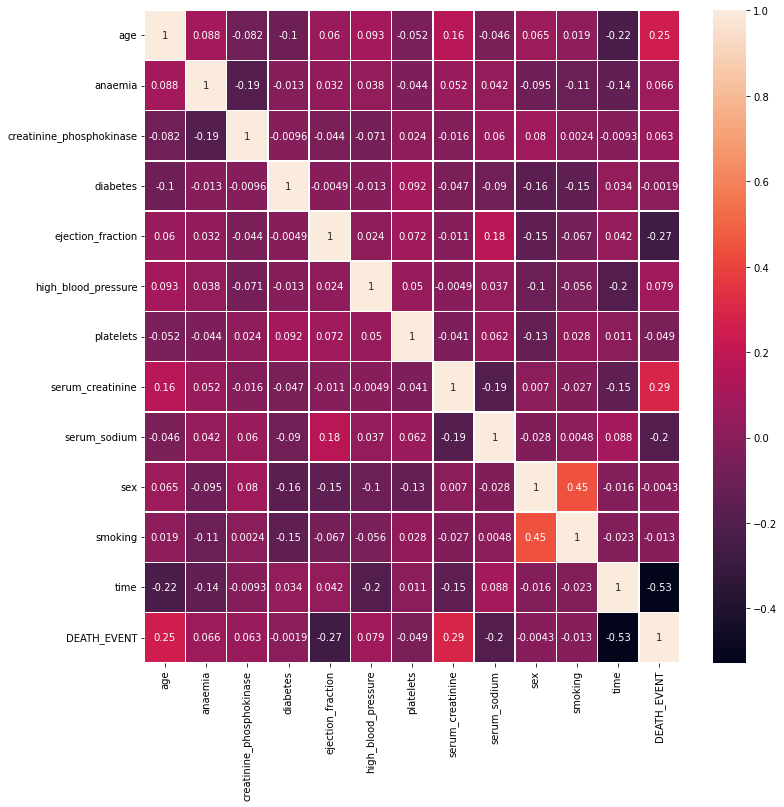

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(heart_faliure_data.corr(), annot = True, linewidths = .5, ax = ax)
plt.show()

In [ ]:
feature_correlation_matrix = heart_faliure_data.corr()
feature_correlation_matrix[abs(feature_correlation_matrix['DEATH_EVENT']) > 0.2]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

# PCA

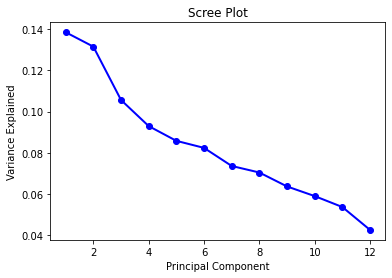

[0.13858049 0.13159129 0.10567855 0.09299485 0.0858236  0.08240632
 0.07361317 0.07044072 0.06366814 0.05898425 0.05366763 0.04255099]


In [ ]:
X = heart_faliure_data.drop('DEATH_EVENT', 1) 
y = heart_faliure_data['DEATH_EVENT']
X_normalised = StandardScaler().fit_transform(X)
pca = PCA(n_components=12)
X_reduced = pca.fit_transform(X_normalised)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(pca.explained_variance_ratio_)

**2 PCA components**

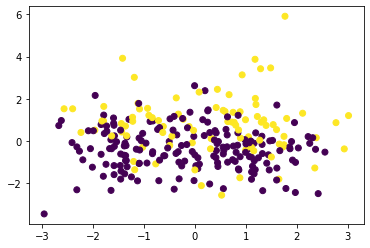

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.1, random_state=101)
X_, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

pca = PCA(n_components=3, random_state=123)
pca.fit(X_train)
pca_result = pca.transform(X_train)

plt.scatter(pca_result[:,0], pca_result[:,1] , c=y_train, cmap='viridis')

**3 PCA components**

In [ ]:
y_train = y_train.to_numpy()
final_df_3PCs = pd.DataFrame(columns=["PC1", "PC2", "PC3","Label"])

for i in range(len(pca_result)):
    
    dicti = dict()
    
    dicti["PC1"] = pca_result[i, 0]
    dicti["PC2"] = pca_result[i, 1]
    dicti["PC3"] = pca_result[i, 2]
    if (y_train[i] == 0):
      dicti["Label"] = "Disease"
    else:
      dicti["Label"] = "Healthy"
    
    final_df_3PCs = final_df_3PCs.append(dicti, ignore_index = True)

final_df_3PCs.head()

,PC1,PC2,PC3,Label
0,-1.247015,-1.715338,1.395329,Disease
1,-0.053458,-0.510761,0.750750,Disease
2,-1.295987,1.021318,-0.247999,Disease
3,-1.362915,-0.941749,1.659759,Disease
4,0.342508,0.085888,1.963898,Healthy


In [ ]:
fig = px.scatter_3d(final_df_3PCs, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

# FastICA

In [ ]:
ica = FastICA(n_components=3, random_state=123, max_iter = 1000, tol = 0.05)
ica.fit(X_train)
ica_result = ica.transform(X_train)

**2 FastICA components**

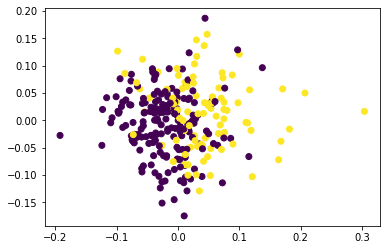

In [ ]:
plt.scatter(ica_result[:,0], ica_result[:,1] , c=y_train, cmap='viridis')

**3 FastICA components**

In [ ]:
final_df_3ICAs = pd.DataFrame(columns=["ICA1", "ICA2", "ICA3","Label"])

for i in range(len(pca_result)):
    
    dicti = dict()
    
    dicti["ICA1"] = ica_result[i, 0]
    dicti["ICA2"] = ica_result[i, 1]
    dicti["ICA3"] = ica_result[i, 2]
    if (y_train[i] == 0):
      dicti["Label"] = "Disease"
    else:
      dicti["Label"] = "Healthy"
    
    final_df_3ICAs = final_df_3ICAs.append(dicti, ignore_index = True)

final_df_3ICAs.head()

,ICA1,ICA2,ICA3,Label
0,-0.076828,0.072052,-0.071091,Disease
1,-0.016806,0.043013,-0.013777,Disease
2,0.034442,-0.042903,-0.056758,Disease
3,-0.038865,0.074958,-0.085235,Disease
4,0.026771,0.103331,-0.022806,Healthy


In [ ]:
fig = px.scatter_3d(final_df_3ICAs, x='ICA1', y='ICA2', z='ICA3', color='Label', title="FastICA")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

# Isomap

In [ ]:
isomap = Isomap(n_components=3, n_neighbors = 5, neighbors_algorithm = 'ball_tree')
isomap.fit(X_train)
isomap_result = isomap.transform(X_train)

**2 Isomap components**

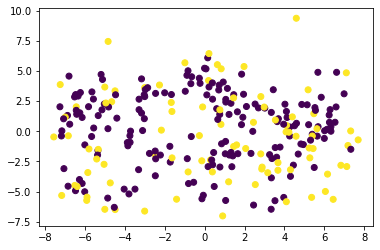

In [ ]:
plt.scatter(isomap_result[:,0], isomap_result[:,1] , c=y_train, cmap='viridis')

**3 Isomap Components**

In [ ]:
final_df_3Isomaps = pd.DataFrame(columns=["Isomap1", "Isomap2", "Isomap3","Label"])
for i in range(len(isomap_result)):   
    dicti = dict()   
    dicti["Isomap1"] = isomap_result[i, 0]
    dicti["Isomap2"] = isomap_result[i, 1]
    dicti["Isomap3"] = isomap_result[i, 2]
    if (y_train[i] == 0):
      dicti["Label"] = "Disease"
    else:
      dicti["Label"] = "Healthy"   
    final_df_3Isomaps = final_df_3Isomaps.append(dicti, ignore_index = True)
final_df_3Isomaps.head()

,Isomap1,Isomap2,Isomap3,Label
0,-5.591796,2.684504,-1.862478,Disease
1,-0.235300,3.992899,-0.289991,Disease
2,-3.806728,-5.199972,-1.394615,Disease
3,-3.750269,-0.910080,-2.154578,Disease
4,-3.015838,3.636540,3.987493,Healthy


In [ ]:
fig = px.scatter_3d(final_df_3Isomaps, x='Isomap1', y='Isomap2', z='Isomap3', color='Label', title="Isomap")
fig.update_traces(marker=dict(size=6,))
fig.show(renderer = "colab")

# TSNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=10 ,random_state=123)
tsne_result = tsne.fit_transform(X_train)

**2 TSNE components**

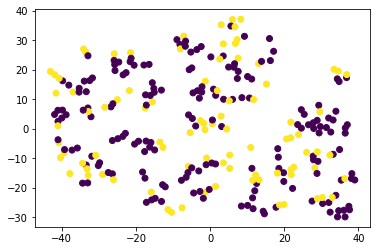

In [ ]:
plt.scatter(tsne_result[:,0], tsne_result[:,1] , c=y_train, cmap='viridis')

**3 TSNE components**

In [ ]:
tsne = TSNE(n_components=3, perplexity=10 ,random_state=123)
tsne_result = tsne.fit_transform(X_train)

In [ ]:
final_df_3TSNEs = pd.DataFrame(columns=["TSNE1", "TSNE2", "TSNE3","Label"])
for i in range(len(tsne_result)):   
    dicti = dict()   
    dicti["TSNE1"] = tsne_result[i, 0]
    dicti["TSNE2"] = tsne_result[i, 1]
    dicti["TSNE3"] = tsne_result[i, 2]
    if (y_train[i] == 0):
      dicti["Label"] = "Disease"
    else:
      dicti["Label"] = "Healthy"    
    final_df_3TSNEs = final_df_3TSNEs.append(dicti, ignore_index = True)
final_df_3TSNEs.head()

,TSNE1,TSNE2,TSNE3,Label
0,34.708527,101.112541,36.843594,Disease
1,104.649818,-45.861145,20.837929,Disease
2,-115.280571,44.348305,-66.574890,Disease
3,-68.182076,-131.276810,40.667435,Disease
4,97.213097,27.313913,-64.280479,Healthy


In [ ]:
fig = px.scatter_3d(final_df_3TSNEs, x='TSNE1', y='TSNE2', z='TSNE3', color='Label', title="TSNE")
fig.update_traces(marker=dict(size=6,))
fig.show(renderer = "colab")

# UMAP

In [ ]:
u = umap.UMAP(n_components=3)
u.fit(X_train)
umap_result = u.transform(X_train)

NameError: ignored

**2 umap components**

In [ ]:
plt.scatter(umap_result[:,0], umap_result[:,1] , c=y_train, cmap='viridis')

**3 umap components**

In [ ]:
final_df_3UMAPs = pd.DataFrame(columns=["UMAP1", "UMAP2", "UMAP3","Label"])
for i in range(len(umap_result)):    
    dicti = dict()   
    dicti["UMAP1"] = umap_result[i, 0]
    dicti["UMAP2"] = umap_result[i, 1]
    dicti["UMAP3"] = umap_result[i, 2]
    if (y_train[i] == 0):
      dicti["Label"] = "Disease"
    else:
      dicti["Label"] = "Healthy"
    final_df_3UMAPs = final_df_3UMAPs.append(dicti, ignore_index = True)
final_df_3UMAPs.head()

In [ ]:
fig = px.scatter_3d(final_df_3UMAPs, x='UMAP1', y='UMAP2', z='UMAP3', color='Label', title="UMAP")
fig.update_traces(marker=dict(size=6,))
fig.show(renderer = "colab")

# SMOTE

In [ ]:
# X_Reduced = heart_faliure_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']] 
X = heart_faliure_data.drop('DEATH_EVENT', 1) 
Y = heart_faliure_data['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 2, stratify = Y)

In [ ]:
sampling = SMOTE(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train.values, y_train.values.ravel())

perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)

X_train = X_train_resampled
y_train = y_train_resampled

print(X_train_resampled.shape)
print(y_train_resampled.shape)

(284, 12)
(284, 1)


In [ ]:
c0 = 0
c1 = 0
for i in range(len(y_train_resampled)):
  if y_train_resampled[0][i] == 0:
    c0 = c0 + 1
  else:
    c1 = c1 + 1
x1 = [0,1]
y1 = [c0,c1]
plt.bar(x1, y1, color ='green',width = 0.4)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of target variable(Death Event) after SMOTE')
plt.show()

print(c0,)

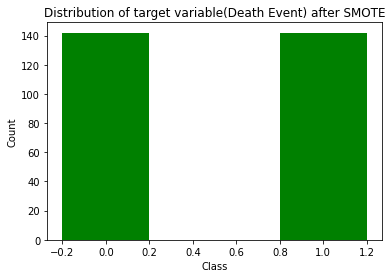

142


# SVM with RBF kernal

In [ ]:
svm = SVC(kernel = 'rbf', probability = True, random_state = 100)
svm = svm.fit(X_train_resampled, y_train_resampled)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("*******************Support Vector Machine RBF*******************")
print("Accuracy of the model = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)

print("\nConfusion Matrix")
conf_matx = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix...
fig, axes = plt.subplots(1,1,figsize = (10, 5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes)
plt.show()

# All models 

In [ ]:
X = heart_faliure_data.drop('DEATH_EVENT', 1) 
y = heart_faliure_data['DEATH_EVENT']
X = StandardScaler().fit_transform(X)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, train_size = 0.7, test_size = 0.3, random_state = 2, stratify = y)

In [ ]:
isomap = Isomap(n_components=5, n_neighbors = 5, neighbors_algorithm = 'ball_tree')
isomap.fit(X)
isomap_result = isomap.transform(X)

In [ ]:
pca = PCA(n_components=5, random_state=123)
pca.fit(X)
pca_result = pca.transform(X)

In [ ]:
#y = y.to_numpy()
final_df_5PCs = pd.DataFrame(columns=["PC1", "PC2", "PC3", "PC4", "PC5", "Label"])

for i in range(len(pca_result)):
    
    dicti = dict()
    
    dicti["PC1"] = pca_result[i, 0]
    dicti["PC2"] = pca_result[i, 1]
    dicti["PC3"] = pca_result[i, 2]
    dicti["PC4"] = pca_result[i, 3]
    dicti["PC5"] = pca_result[i, 4]
    if (y[i] == 0):
      dicti["Label"] = 0
    else:
      dicti["Label"] = 1
    
    final_df_5PCs = final_df_5PCs.append(dicti, ignore_index = True)

final_df_5PCs.head()

,PC1,PC2,PC3,PC4,PC5,Label
0,1641.969406,-0.145905,-126.838452,8.660302,-18.291465,1.0
1,1.766518,7279.254974,-118.588597,-2.082109,4.944131,1.0
2,-101358.133289,-411.138654,-122.907106,14.552424,-9.070842,1.0
3,-53358.143086,-457.772091,-122.790991,23.095645,3.078393,1.0
4,63641.865204,-437.190782,-123.419571,15.833135,-11.488949,1.0


In [ ]:
y = final_df_5PCs["Label"]
# X_Reduced_To = heart_faliure_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']] 
X = final_df_5PCs.drop('Label', 1) 
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size = 0.7, test_size = 0.3, random_state = 2, stratify = y)
sampling = SMOTE(random_state = 100)
X_train_resampled, y_train_resampled = sampling.fit_resample(X_train, y_train.ravel())
perms = np.random.permutation(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[perms]
y_train_resampled = y_train_resampled[perms]

X_train_resampled = pd.DataFrame(data = X_train_resampled)
y_train_resampled = pd.DataFrame(data = y_train_resampled)
X_train = X_train_resampled
y_train = y_train_resampled
print(X_train.shape)
print(y_train.shape)

(284, 5)
(284, 1)


In [ ]:
y = final_df_5PCs["Label"]
# X_Reduced_To = heart_faliure_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']] 
X = final_df_5PCs.drop('Label', 1) 
X_train, X_test, y_train, y_test = train_test_split(X_Reduced, Y, train_size = 0.7, test_size = 0.3, random_state = 2, stratify = Y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

(286, 12)
(286, 1)


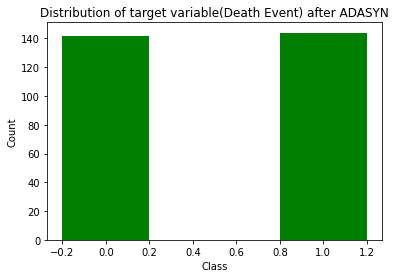

142 144


In [ ]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
# X_Reduced = heart_faliure_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']] 
# Y = heart_faliure_data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 2, stratify = Y)
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_resampled = pd.DataFrame(data = X_train)
y_train_resampled = pd.DataFrame(data = y_train)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

c0 = 0
c1 = 0
for index, row in y_train_resampled.iterrows():
  if row[0] == 0:
    c0 = c0 + 1
  else:
    c1 = c1 + 1
x1 = [0,1]
y1 = [c0,c1]
plt.bar(x1, y1, color ='green',width = 0.4)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of target variable(Death Event) after ADASYN')
plt.show()

print(c0,c1)

In [ ]:
svm = SVC(kernel = 'rbf', probability = True, random_state = 100)
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("*******************Support Vector Machine Sigmoid*******************")
print("Accuracy of the model = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1 - Score = ",f1)
print("ROC_AUC Score = ",roc_auc)



print("\nConfusion Matrix")
conf_matx = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix...
fig, axes = plt.subplots(1,1,figsize = (10, 5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
tree = tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("*******************Decision Tree Gini*******************")
print("Accuracy of the model = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1 - Score = ",f1)
print("ROC_AUC Score = ",roc_auc)



print("\nConfusion Matrix")
conf_matx = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix...
fig, axes = plt.subplots(1,1,figsize = (10, 5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', n_jobs = -1, random_state = 100)
rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("*******************Random Forest Gini*******************")
print("Accuracy of the model = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1 - Score = ",f1)
print("ROC_AUC Score = ",roc_auc)



print("\nConfusion Matrix")
conf_matx = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix...
fig, axes = plt.subplots(1,1,figsize = (10, 5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes)
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs = -1, random_state = 100)
xgb = xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("*******************Support Vector Machine*******************")
print("Accuracy of the model = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1 - Score = ",f1)
print("ROC_AUC Score = ",roc_auc)

print("\nConfusion Matrix")
conf_matx = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix...
fig, axes = plt.subplots(1,1,figsize = (10, 5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes)
plt.show()

*******************Logistic Regression*******************
Accuracy of the model =  0.7888888888888889
Precision =  0.6470588235294118
Recall =  0.7586206896551724
F1 - Score =  0.6984126984126984
ROC_AUC Score =  0.7809496890898813

Confusion Matrix


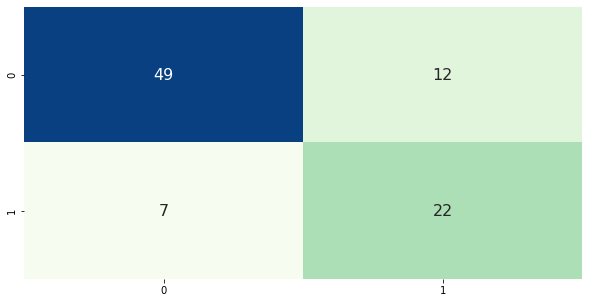

In [ ]:
from sklearn import linear_model
regr = linear_model.LogisticRegression()
regr = regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("*******************Logistic Regression*******************")
print("Accuracy of the model = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1 - Score = ",f1)
print("ROC_AUC Score = ",roc_auc)

print("\nConfusion Matrix")
conf_matx = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix...
fig, axes = plt.subplots(1,1,figsize = (10, 5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("*******************Naive Bayes*******************")
print("Accuracy of the model = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1 - Score = ",f1)
print("ROC_AUC Score = ",roc_auc)

print("\nConfusion Matrix")
conf_matx = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix...
fig, axes = plt.subplots(1,1,figsize = (10, 5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes)
plt.show()